# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

#### Imports y configs

Importamos las librerias y creamos el dataframe

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [13]:
hotel.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
26568,City Hotel,118,2017,April,18,30,2,2,2,0.0,...,No Deposit,9.0,NaN,0,Transient,137.25,0,1,90c2d179-fd68-43c4-870a-f2ce085f1dbf,1
17006,Resort Hotel,36,2016,March,13,22,0,4,2,0.0,...,No Deposit,240.0,NaN,0,Transient,66.50,0,1,cec65f5b-b7d4-4b20-b9f6-dcb5bb87066b,0
45385,City Hotel,214,2017,July,28,13,0,3,2,0.0,...,No Deposit,9.0,NaN,0,Transient-Party,99.90,0,1,6174c1ef-6c3f-43de-9c15-df9c3a4ee78a,0
16617,Resort Hotel,172,2017,April,17,29,2,5,2,0.0,...,No Deposit,314.0,NaN,0,Transient,97.71,0,0,a4901d89-b744-4d15-a100-991fcfa8b3f7,1
24782,City Hotel,97,2017,July,27,6,0,2,2,0.0,...,No Deposit,9.0,NaN,0,Transient,120.00,0,1,d2b38bfb-2213-4810-b04d-a2b4cd3cd103,0


Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [14]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [31]:
cualitativas = hotel[['hotel', 'arrival_date_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled']]
cualitativas

,hotel,arrival_date_month,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled
0,City Hotel,September,37,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,1
1,Resort Hotel,October,44,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,0
2,City Hotel,October,42,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,0
3,City Hotel,December,51,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,NaN,Transient,1
4,City Hotel,March,12,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,NaN,Transient-Party,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,January,4,BB,ESP,Online TA,TA/TO,0,A,D,No Deposit,240.0,NaN,Transient,1
61909,City Hotel,September,36,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,NaN,NaN,Transient,0
61910,City Hotel,May,19,BB,FRA,Aviation,Corporate,0,A,A,No Deposit,NaN,153.0,Transient,0
61911,Resort Hotel,October,41,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,96.0,NaN,Transient,1


La variable 'hotel' puede tomar los siguientes valores:

In [32]:
hotel['hotel'].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [37]:
hotel['arrival_date_month'].value_counts()

April        5878
August       7176
December     3493
February     4125
January      3001
July         6524
June         5772
March        4899
May          6159
November     3404
October      5863
September    5619
Name: arrival_date_month, dtype: int64

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [36]:
hotel['arrival_date_week_number'].value_counts().sort_index()


1      552
2      642
3      668
4      733
5      655
6      735
7     1073
8     1170
9     1082
10    1085
11    1028
12     995
13    1257
14    1189
15    1385
16    1250
17    1547
18    1611
19    1196
20    1464
21    1467
22    1370
23    1362
24    1354
25    1412
26    1232
27    1359
28    1490
29    1424
30    1609
31    1397
32    1600
33    1876
34    1533
35    1305
36    1166
37    1166
38    1456
39    1368
40    1271
41    1449
42    1449
43    1224
44    1170
45    1037
46     837
47     788
48     721
49     915
50     781
51     464
52     575
53     969
Name: arrival_date_week_number, dtype: int64

La variable 'meal' puede tomar los siguientes valores:

In [38]:
hotel['meal'].value_counts().sort_index()

BB           47837
FB             477
HB            7452
SC            5556
Undefined      591
Name: meal, dtype: int64

La variable 'country' puede tomar los siguientes valores:

In [40]:
hotel['country'].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

La variable 'market_segment' puede tomar los siguientes valores:

In [42]:
hotel['market_segment'].value_counts()


Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

La variable 'distribution_channel' puede tomar los siguientes valores:

In [43]:
hotel['distribution_channel'].value_counts()


TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [44]:
hotel['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [46]:
hotel['reserved_room_type'].value_counts().sort_index()

A    45134
B      580
C      482
D     9585
E     3249
F     1451
G     1090
H      334
L        1
P        7
Name: reserved_room_type, dtype: int64

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [48]:
hotel['assigned_room_type'].value_counts().sort_index()


A    40007
B     1056
C     1127
D    12190
E     3779
F     1821
G     1277
H      384
I      145
K      119
L        1
P        7
Name: assigned_room_type, dtype: int64

La variable 'deposit_type' puede tomar los siguientes valores:

In [49]:
hotel['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

La variable 'agent' puede tomar los siguientes valores:

In [50]:
hotel['agent'].value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

La variable 'company' puede tomar los siguientes valores:

In [51]:
hotel['company'].value_counts()


40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

La variable 'customer_type' puede tomar los siguientes valores:

In [52]:
hotel['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

La variable 'is_canceled' puede tomar los siguientes valores:

In [53]:
hotel['is_canceled'].value_counts()


0    30972
1    30941
Name: is_canceled, dtype: int64

#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [54]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


#### Variables irrelevantes para el análisis

Para el análisis de los datos podemos considerar que la variable 'id' será irrelevante ya que no aporta información sobre las reservas de los hoteles, es solamente un identificador de cada una.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

In [57]:
hotel.drop(columns=['id'], inplace=True)

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

<Axes: xlabel='hotel', ylabel='count'>

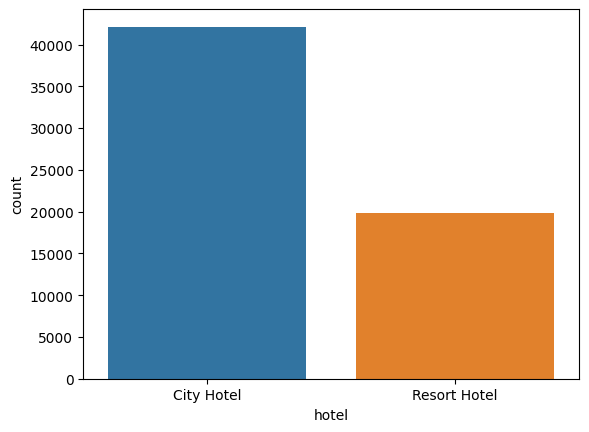

In [82]:
sns.countplot(x='hotel', data=cualitativas)

<Axes: xlabel='customer_type', ylabel='Count'>

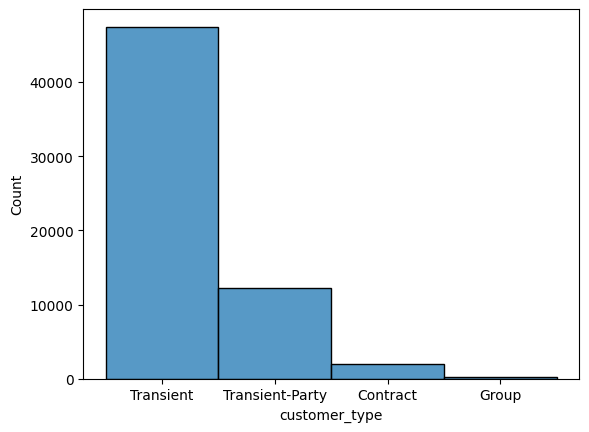

In [85]:
sns.countplot(x='customer_type', data=cualitativas)

<Axes: xlabel='deposit_type', ylabel='count'>

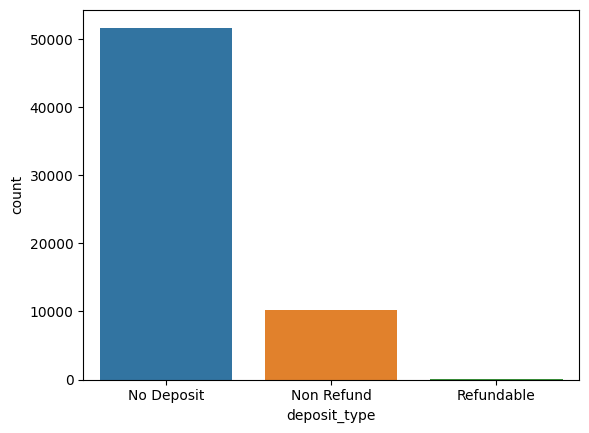

In [87]:
sns.countplot(x='deposit_type', data=cualitativas)

<Axes: xlabel='distribution_channel', ylabel='count'>

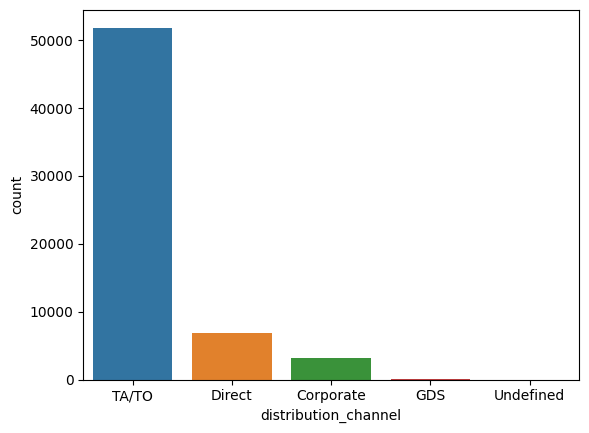

In [89]:
sns.countplot(x='distribution_channel', data=cualitativas)

<Axes: xlabel='market_segment', ylabel='count'>

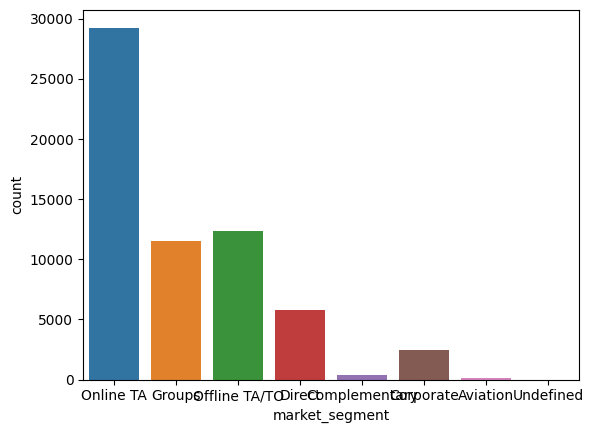

In [90]:
sns.countplot(x='market_segment', data=cualitativas)

<Axes: xlabel='count', ylabel='country'>

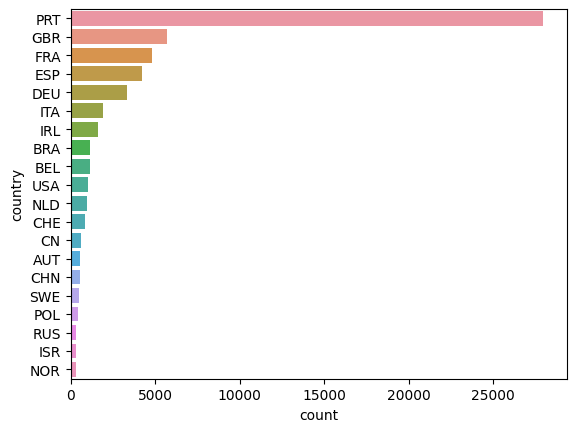

In [96]:
# graficar country ordenados por apariciones, los 20 primeros
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

<Axes: xlabel='value', ylabel='Count'>

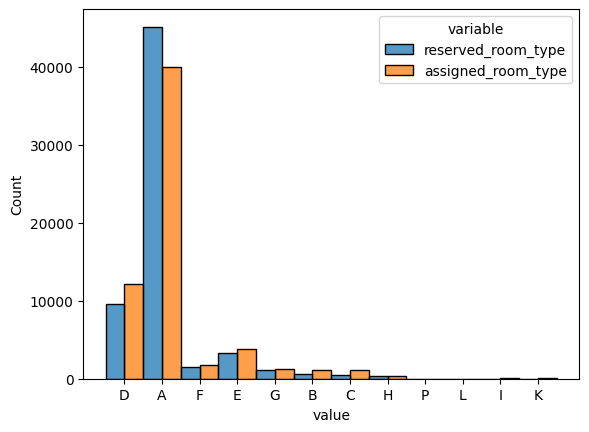

In [131]:
# copiar las columnas 'assigned_room_type' y 'reserved_room_type' en un nuevo dataframne
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

# plot the histogram using seaborn, ordenar por apariciones
sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')



<Axes: xlabel='is_repeated_guest', ylabel='count'>

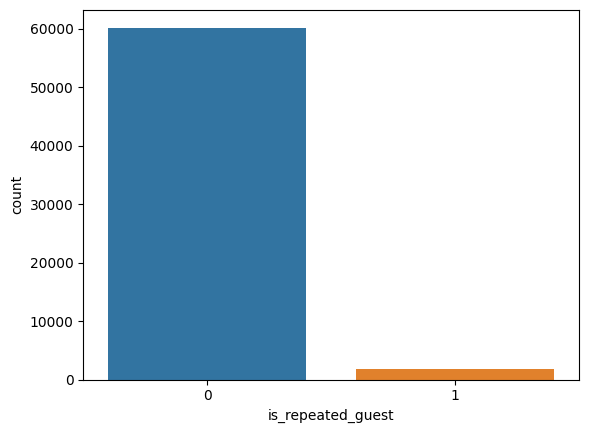

In [132]:
# graficar 'is_repeat_guest'
sns.countplot(x='is_repeated_guest', data=cualitativas)


<Axes: xlabel='meal', ylabel='count'>

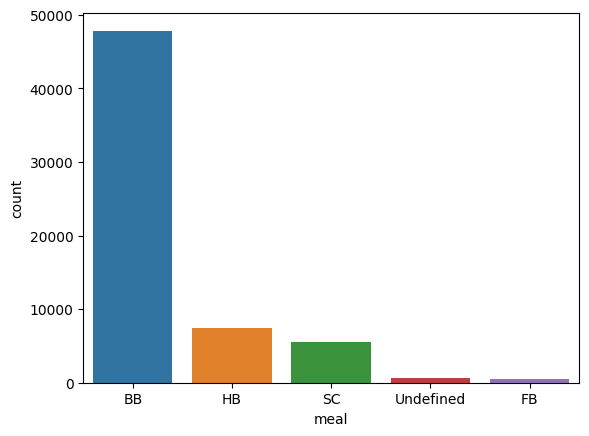

In [136]:
# graficar meal
sns.countplot(x='meal', data=cualitativas)

<Axes: xlabel='is_canceled', ylabel='count'>

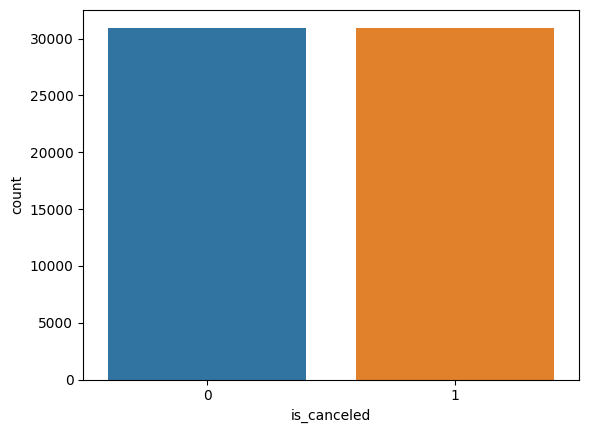

In [137]:
# graficar is_canceled
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

<Axes: xlabel='lead_time', ylabel='Count'>

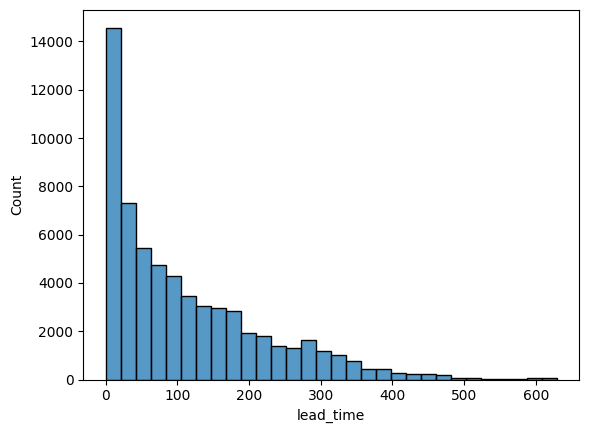

In [81]:
# graficar 'lead_time'
sns.histplot(hotel['lead_time'], bins=30)

#### Correlaciones entre variables

#### Relación de variables con el target

### **Visualización de los datos**

### **Datos faltantes**

#### Análisis

#### Revisión y decisión

#### Comparaciones

### **Valores atípicos**

#### Detección

##### Univariada

##### Multivariada

#### Características

#### Tratamiento

## BORRADOR ///

In [10]:
#Datos nulos
hotel.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


'company' y 'agent' tienen muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [4]:
#Datos no nulos
hotel.notna().sum()

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


In [5]:
#Tipo de dato de las variables
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [6]:
#Medidas de resumen del dataframe
hotel.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [7]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [8]:
# Reservas canceladas por hotel
pd.crosstab(hotel['hotel'], hotel['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,19017,23112
Resort Hotel,11955,7829


City Hotel tiene muchas mas reservas canceladas que el Resort Hotel

In [9]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?
prop_cancelaciones = len(hotel[hotel['is_canceled'] == 1]) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

La proporción de reservas canceladas en relación al total de reservas es 49.97%


In [10]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

is_canceled,0,1
days_in_waiting_list,,
0,30377,29301
1,4,2
2,3,1
3,0,41
4,9,6
...,...,...
236,13,3
259,5,0
330,6,1


<Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>

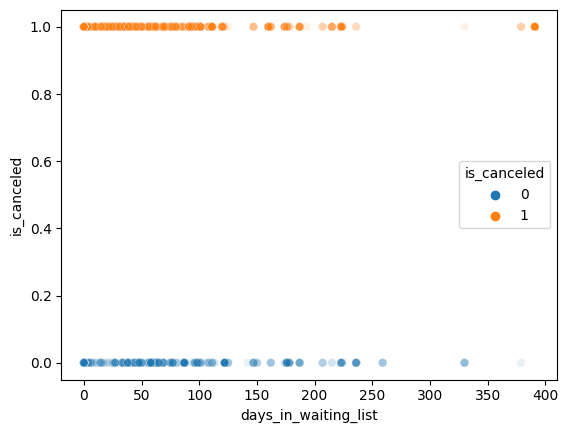

In [11]:
# graficar cancelado vs tiempo de espera
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [12]:
# Reservas canceladas por tipo de cliente
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
customer_type,,
Transient,21864,25585
Transient-Party,7736,4432
Contract,1155,878
Group,217,46


<Axes: xlabel='customer_type', ylabel='count'>

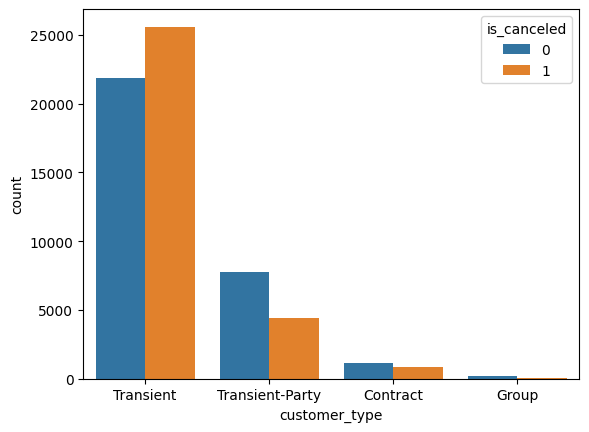

In [13]:
# graficareservas canceladas por tipo de cliente
sns.countplot(x='customer_type', data=hotel, hue='is_canceled')

In [14]:
# ¿Cuál es la proporción de reservas canceladas por clientes Transient en relación con el total de reservas realizadas por clientes Transient?
prop_cancelaciones_transient = len(hotel[(hotel['is_canceled'] == 1) & (hotel['customer_type'] == 'Transient')]) / len(hotel[(hotel['customer_type'] == 'Transient')]) *100
print(f"La proporción de reservas canceladas por clientes Transient es {prop_cancelaciones_transient:.2f}%")

La proporción de reservas canceladas por clientes Transient es 53.92%


In [15]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
adr,,
62.00,290,2106
90.00,420,1021
75.00,650,852
80.00,332,753
120.00,270,699
...,...,...
99.46,2,0
99.48,2,0
99.51,1,0


<Axes: xlabel='adr', ylabel='is_canceled'>

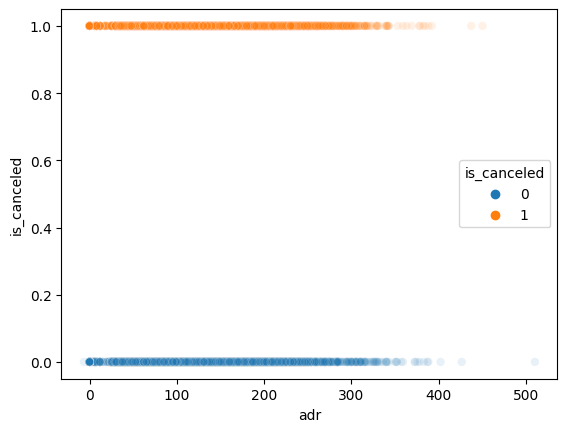

In [16]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [17]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
country,,
PRT,8724,19226
GBR,4040,1693
ESP,2681,1529
FRA,3469,1340
ITA,985,926
...,...,...
MCO,1,0
SDN,1,0
CUB,4,0


<Axes: xlabel='country'>

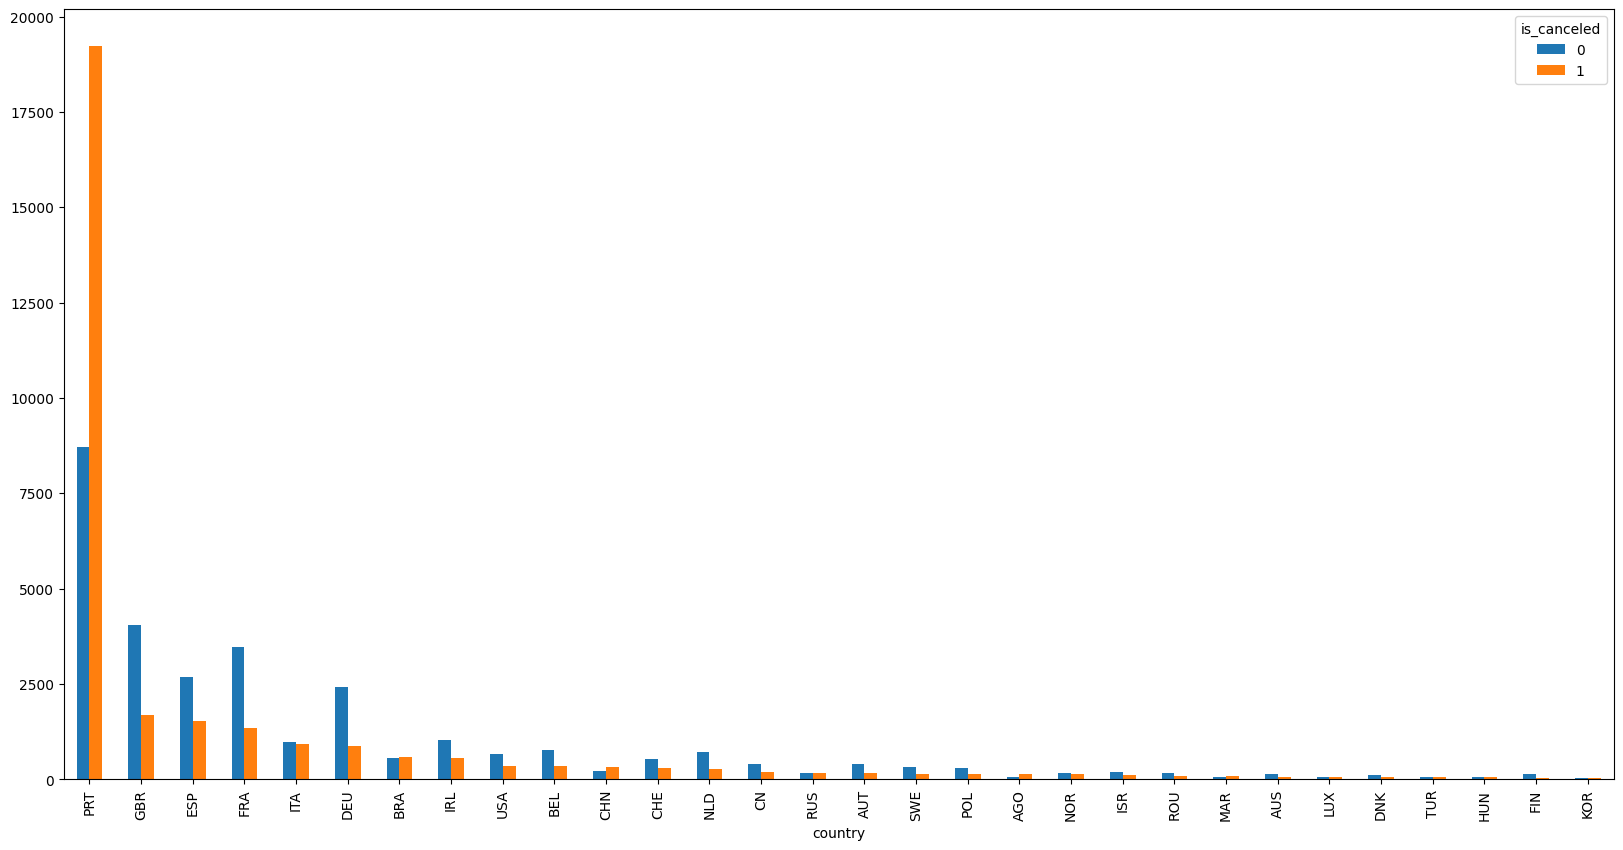

In [18]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [19]:
# Reservas canceladas segun si es un cliente repetido
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
is_repeated_guest,,
0,29643,30537
1,1329,404


Si es cliente repetido, no suelen cancelar tantas reservas como si son clientes nuevos

<Axes: xlabel='is_repeated_guest', ylabel='count'>

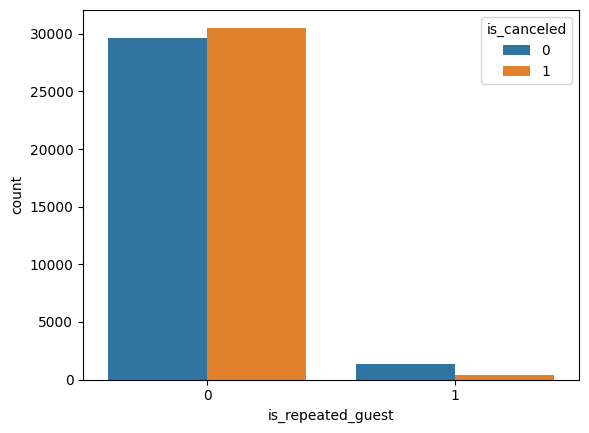

In [20]:
# graficareservas canceladas segun si es un cliente repetido
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled')

In [21]:
# Reservas canceladas segun el tipo de deposito
pd.crosstab(hotel['deposit_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
deposit_type,,
No Deposit,30885,20800
Non Refund,37,10113
Refundable,50,28


<Axes: xlabel='deposit_type', ylabel='count'>

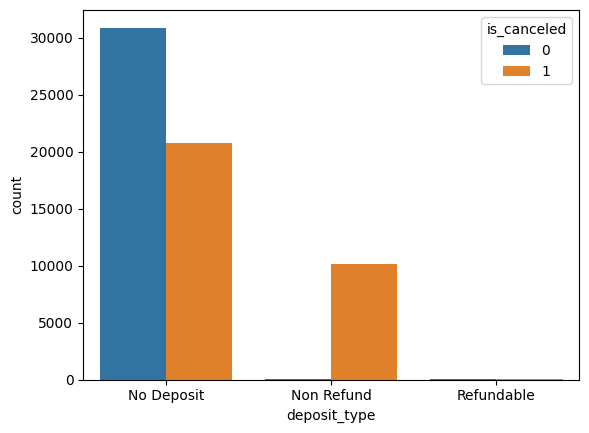

In [22]:
# graficareservas canceladas segun el tipo de deposito
sns.countplot(x='deposit_type', data=hotel, hue='is_canceled')

In [23]:
# Reservas canceladas segun el tipo de habitacion
pd.crosstab(hotel['assigned_room_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
assigned_room_type,,
A,17002,23005
D,7741,4449
E,2379,1400
F,1184,637
G,715,562
B,687,369
C,810,317
H,203,181
K,111,8


<Axes: xlabel='assigned_room_type', ylabel='count'>

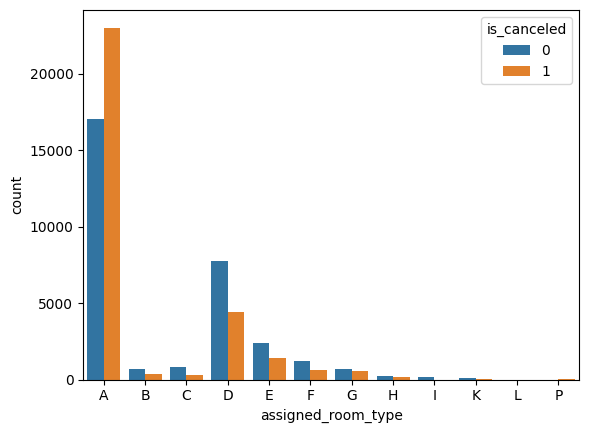

In [24]:
# graficareservas canceladas segun el tipo de habitacion ordendas por orden alfabetico
sns.countplot(x='assigned_room_type', data=hotel, hue='is_canceled', order=sorted(hotel['assigned_room_type'].unique()))

In [25]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


is_canceled,0,1
meal,,
BB,23693,24144
HB,3966,3486
SC,2785,2771
FB,144,333
Undefined,384,207


<Axes: xlabel='meal', ylabel='count'>

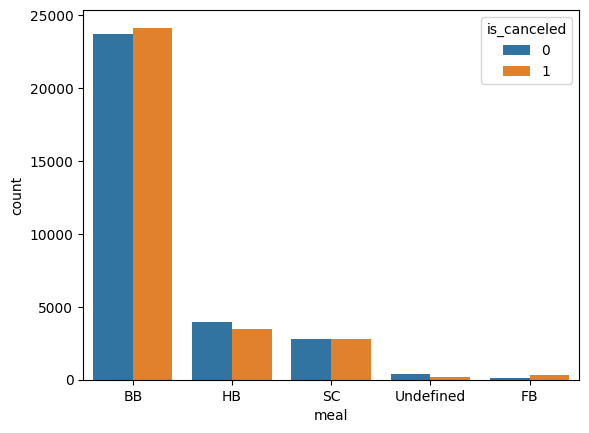

In [26]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [27]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
distribution_channel,,
TA/TO,23738,28111
Direct,5036,1763
Corporate,2135,1037
GDS,63,26
Undefined,0,4


<Axes: xlabel='distribution_channel', ylabel='count'>

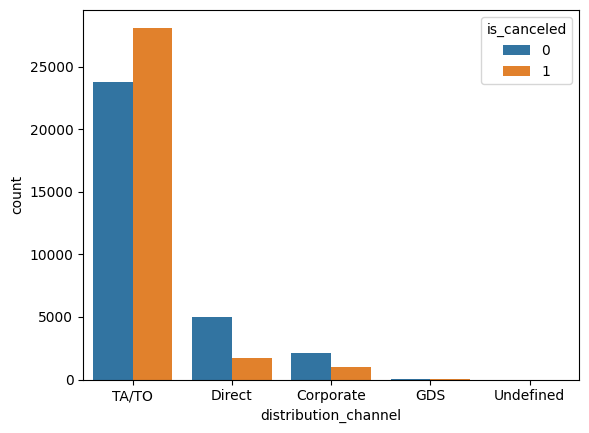

In [28]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

In [29]:
# Reservas canceladas segun el tiempo entre la reserva y la llegada
pd.crosstab(hotel['lead_time'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
lead_time,,
0,2454,310
56,124,262
28,205,240
37,142,232
34,213,229
...,...,...
382,1,0
445,1,0
388,9,0


<Axes: xlabel='lead_time', ylabel='is_canceled'>

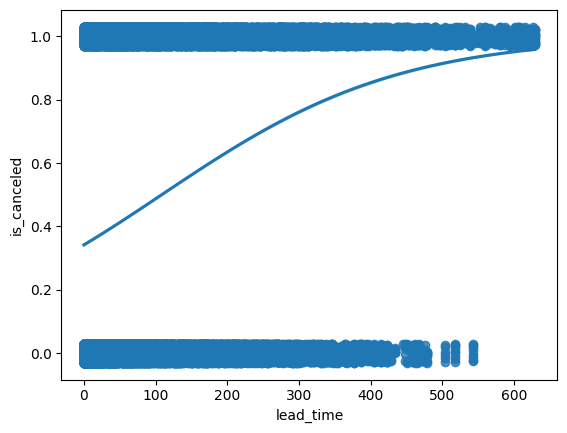

In [30]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [31]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


is_canceled                 0      1
adults children babies              
2      0.0      0       20171  22636
1      0.0      0        6691   4643
3      0.0      0        1548   1318
2      2.0      0         746    977
       1.0      0        1100    877
3      1.0      0         112    159
2      0.0      1         224     97
0      2.0      0          58     57
1      1.0      0          84     47
       2.0      0          41     36

In [32]:
# Correlacion de pearson de las variables con 'is_canceled'
correlacion = hotel.corr(method='pearson')
correlacion['is_canceled'].sort_values(ascending=False).reset_index()


C:\Users\Luca\AppData\Local\Temp\ipykernel_22096\1911941991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = hotel.corr(method='pearson')


,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


array([[<Axes: xlabel='is_canceled', ylabel='is_canceled'>,
        <Axes: xlabel='lead_time', ylabel='is_canceled'>,
        <Axes: xlabel='previous_cancellations', ylabel='is_canceled'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>],
       [<Axes: xlabel='is_canceled', ylabel='lead_time'>,
        <Axes: xlabel='lead_time', ylabel='lead_time'>,
        <Axes: xlabel='previous_cancellations', ylabel='lead_time'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='lead_time'>],
       [<Axes: xlabel='is_canceled', ylabel='previous_cancellations'>,
        <Axes: xlabel='lead_time', ylabel='previous_cancellations'>,
        <Axes: xlabel='previous_cancellations', ylabel='previous_cancellations'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='previous_cancellations'>],
       [<Axes: xlabel='is_canceled', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='lead_time', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='previous_cancellations', yla

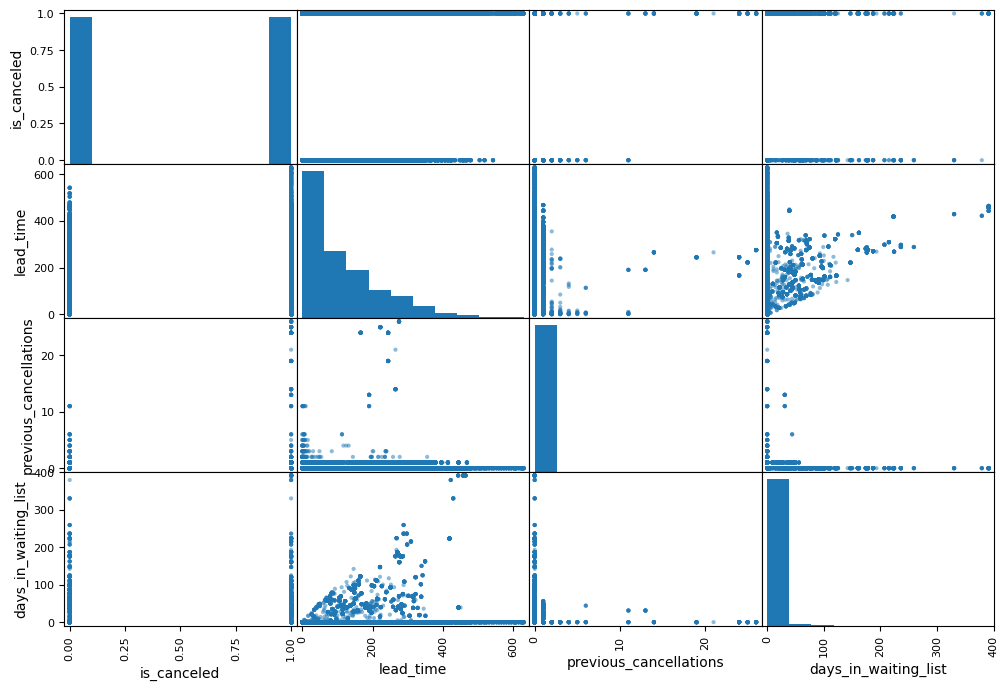

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["is_canceled", "lead_time", "previous_cancellations", "days_in_waiting_list"]
scatter_matrix(hotel[attributes], figsize=(12, 8))

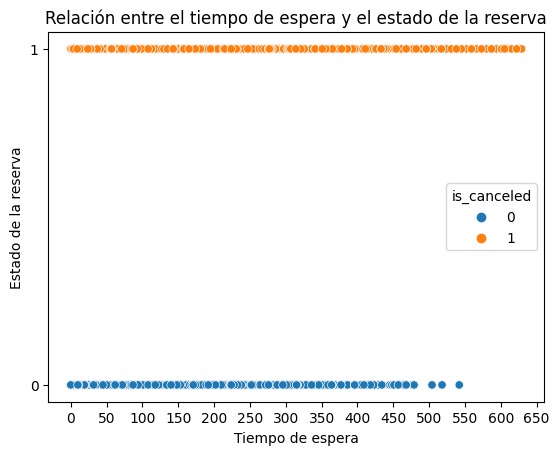

In [34]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

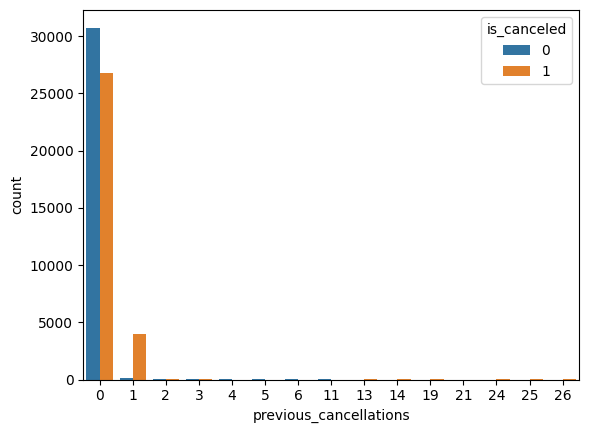

In [35]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

<Axes: xlabel='arrival_date_week_number', ylabel='count'>

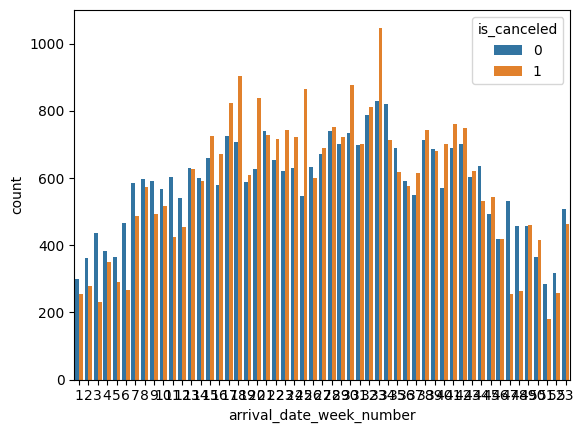

In [36]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [74]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,arrival_date
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19


<Axes: xlabel='arrival_date', ylabel='is_canceled'>

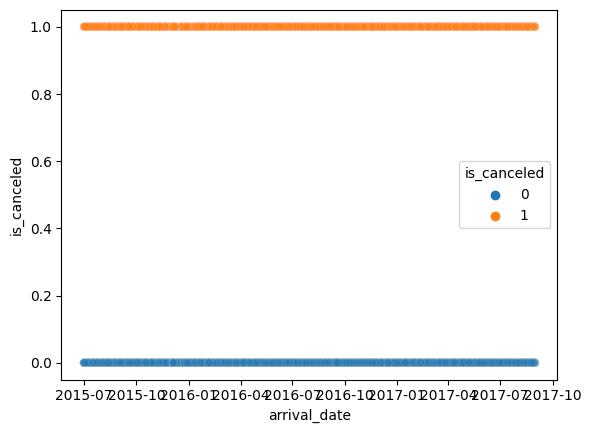

In [75]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

<Axes: xlabel='hotel', ylabel='count'>

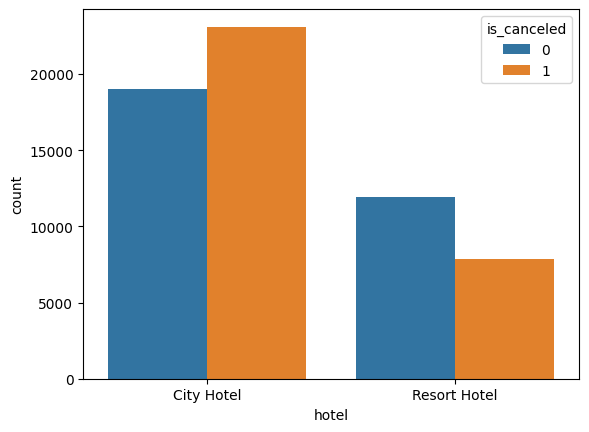

In [76]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [77]:
# heatmap de correlacion de pearson


<Axes: xlabel='deposit_type', ylabel='hotel'>

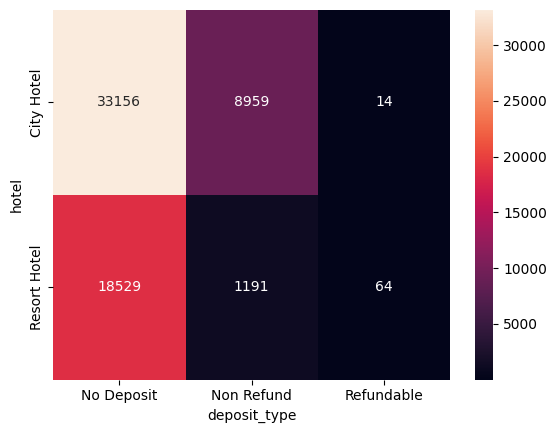

In [78]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

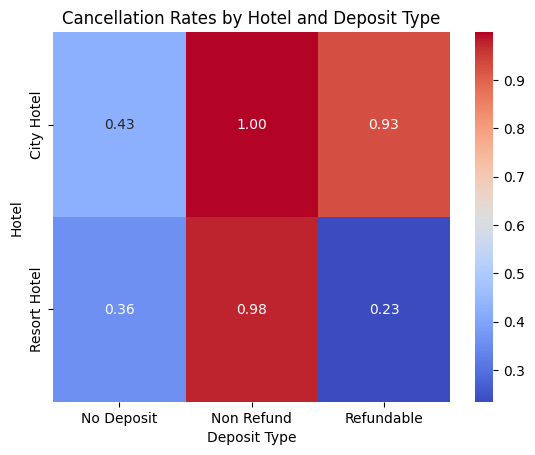

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = hotel_reducido.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()


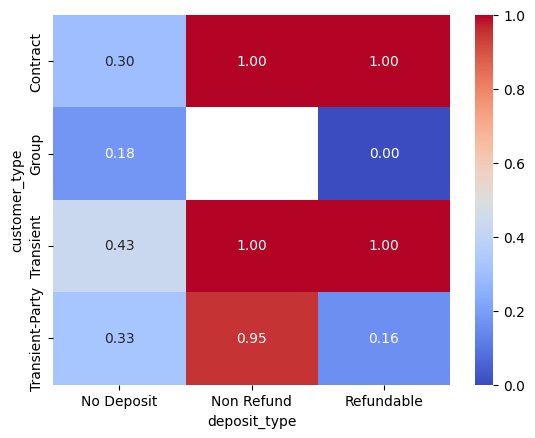

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = hotel_reducido.pivot_table(
    index='customer_type', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()


In [81]:
hotel_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           61913 non-null  object        
 1   lead_time                       61913 non-null  int64         
 2   arrival_date_week_number        61913 non-null  int64         
 3   stays_in_weekend_nights         61913 non-null  int64         
 4   stays_in_week_nights            61913 non-null  int64         
 5   adults                          61913 non-null  int64         
 6   children                        61909 non-null  float64       
 7   babies                          61913 non-null  int64         
 8   meal                            61913 non-null  object        
 9   country                         61692 non-null  object        
 10  market_segment                  61913 non-null  object        
 11  di

In [82]:
# dropeamos company xq son la mayoria nulos
hotel_reducido.drop('company', axis=1, inplace=True)
hotel_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           61913 non-null  object        
 1   lead_time                       61913 non-null  int64         
 2   arrival_date_week_number        61913 non-null  int64         
 3   stays_in_weekend_nights         61913 non-null  int64         
 4   stays_in_week_nights            61913 non-null  int64         
 5   adults                          61913 non-null  int64         
 6   children                        61909 non-null  float64       
 7   babies                          61913 non-null  int64         
 8   meal                            61913 non-null  object        
 9   country                         61692 non-null  object        
 10  market_segment                  61913 non-null  object        
 11  di

<Axes: xlabel='agent', ylabel='count'>

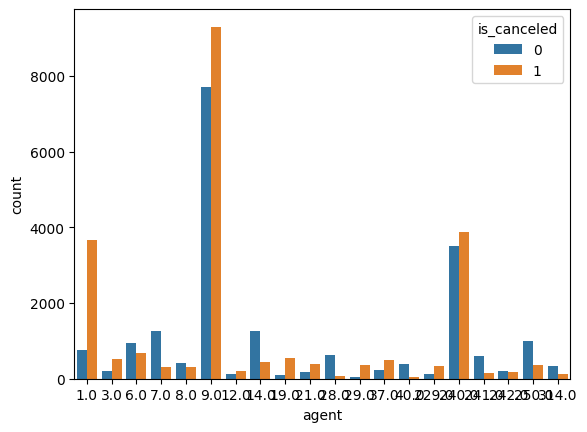

In [91]:
# graficar relacion entre 20 agents mas comunes y 'is_canceled'
top_20_agents = hotel_reducido['agent'].value_counts().head(20).index
sns.countplot(x='agent', hue='is_canceled', data=hotel_reducido[hotel_reducido['agent'].isin(top_20_agents)])


<Axes: xlabel='babies', ylabel='count'>

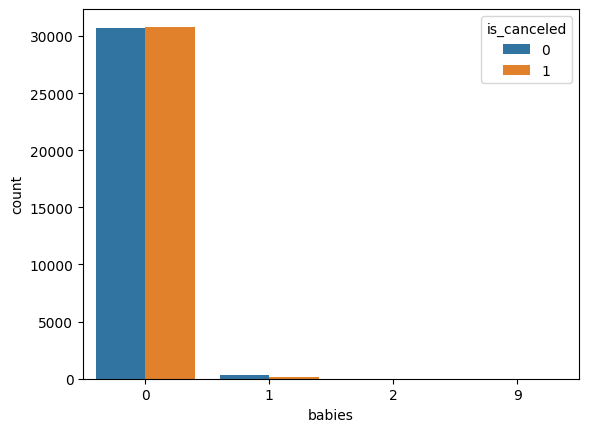

In [92]:
# graficar relacion entre 'babies' y 'is_canceled'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido)

<Axes: xlabel='babies', ylabel='count'>

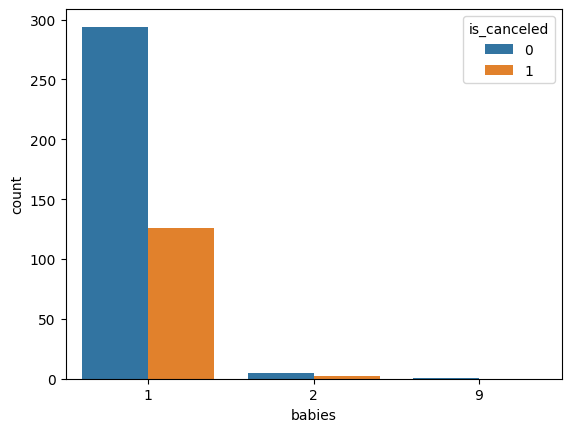

In [93]:
# graficar relacion entre 'babies' y 'is_canceled', sacanado los registros con 0 'babies'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido[hotel_reducido['babies'] != 0])


<Axes: xlabel='children', ylabel='count'>

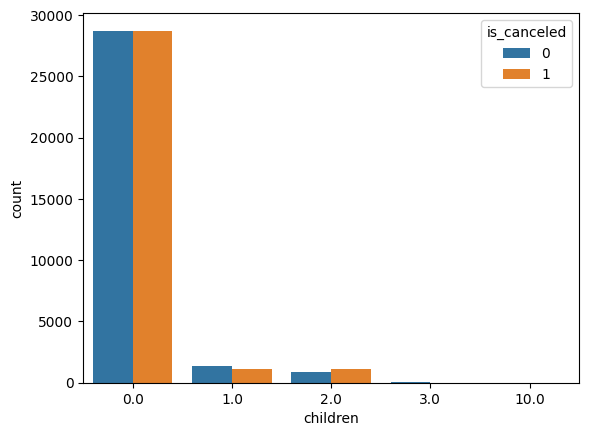

In [94]:
# graficar relacion entre 'childre' y 'is_canceled'
sns.countplot(x='children', hue='is_canceled', data=hotel_reducido)

<Axes: xlabel='babies', ylabel='count'>

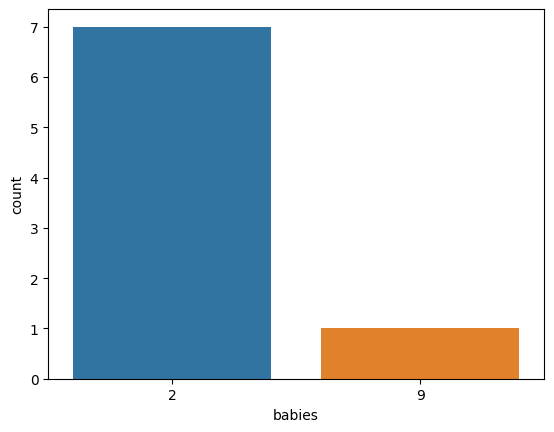

In [98]:
# graficar cantidad de bebes por reserva, sacando los registros con 0 'babies'
sns.countplot(x='babies', data=hotel_reducido[hotel_reducido['babies'] > 1])

<Axes: xlabel='children', ylabel='count'>

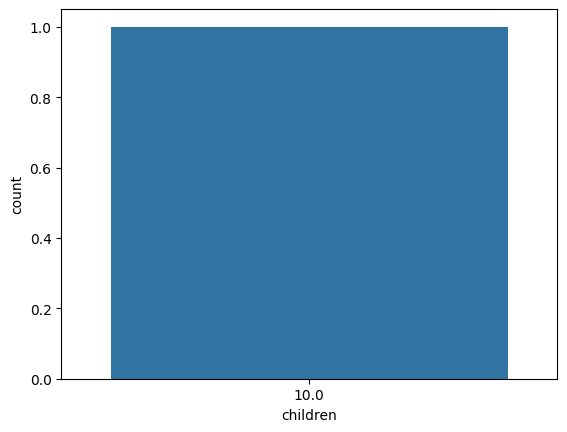

In [106]:
# graficar cantidad de 'children' por reserva
sns.countplot(x='children', data=hotel_reducido[hotel_reducido['children'] > 3])

In [107]:
# buscar registros con 'children' > 3
hotel_reducido[hotel_reducido['children'] > 3]


,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,arrival_date
49181,Resort Hotel,55,29,4,10,2,10.0,0,BB,PRT,...,0,Contract,133.16,0,1,No-Show,2015-07-12,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1,2015-07-12


In [109]:
# buscar registros con 'babies' > 2
hotel_reducido[hotel_reducido['babies'] > 2]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled,arrival_date
12659,City Hotel,11,42,2,1,1,0.0,9,BB,GBR,...,0,Transient-Party,95.0,0,0,Check-Out,2015-10-14,a864cf91-980a-48da-9b71-c0b487096239,0,2015-10-11
